# Libraries dependency importing...

In [547]:
        
    try:
        import os
        import numpy as np
        from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
        import warnings
        warnings.filterwarnings('ignore')
        from sklearn.metrics import roc_auc_score
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        import seaborn as sns
        sns.set_style('whitegrid')
        plt.style.use('seaborn-deep')
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.serif'] = 'Ubuntu'
        plt.rcParams['font.monospace'] = 'Ubuntu Mono'
        plt.rcParams['font.size'] = 10
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 12
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['figure.titlesize'] = 14
        plt.rcParams['figure.figsize'] = (12, 8)
        import warnings
        warnings.filterwarnings('ignore')
        import sklearn.base as skb
        import sklearn.metrics as skm
        import sklearn.model_selection as skms
        import sklearn.preprocessing as skp
        import sklearn.utils as sku
        import sklearn.linear_model as sklm
        #from sklearn.impute import KNNImputer
        import sklearn.neighbors as skn
        import sklearn.ensemble as ske
        import catboost as cb
        import scipy.stats as sstats
        import pandas as pd
        import random
        seed = 12
        np.random.seed(seed)
        from datetime import date
        print("Hey, great libraries dependencies are successfully Installed !")
    except Exception as e:
        print("Oh! Library {} is not installed or having same issues.".format(str(e)))

Hey, great libraries dependencies are successfully Installed !


In [548]:
os.getcwd()

'C:\\Users\\Sajid\\Desktop'

# data file importing with exception handling

In [668]:
class file_importing():
    import os
    os.chdir('C:\\Users\\Sajid\\Desktop')
    try:
        def file_importing(self,file_path):
            if "xlsx" in str(file_path) or "xls" in str(file_path):
                df=pd.read_excel(file_path)
                return df
            elif "csv" in str(file_path):
                df=pd.read_csv(file_path)
                return df
            else:
                print("Hey! You are not using any file")
            
    except Exception as ex:
        print("Error Excetion type: ",str(ex))


# Creating dataframe using pandas python library

In [797]:
import pandas as pd
entries = os.listdir()
with os.scandir(r'Analytics Vidya/test') as entries:
    for entry in entries:
        test=file_importing().file_importing(entry)
with os.scandir('Analytics Vidya/train') as entries:
    for entry in entries:
        train=file_importing().file_importing(entry)
    

In [798]:
with os.scandir(r'Analytics Vidya/test') as entries:
    for entry in entries:
        test=file_importing().file_importing(entry)

# Data Preprocessing Functions

In [799]:
def Label_Encoder(df,column_name):
    return LabelEncoder().fit_transform(df[column_name])
def generate_dummies_data(columns_list):
    return pd.get_dummies(columns_list)

# checking the number of records in the training and testing dataset

In [800]:
train.shape,test.shape

((245725, 11), (105312, 10))

# checking, Is traning or testing hauing 'NaN' values

In [801]:
train.isnull().sum(),test.isnull().sum()

(ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         29325
 Avg_Account_Balance        0
 Is_Active                  0
 Is_Lead                    0
 dtype: int64, ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         12522
 Avg_Account_Balance        0
 Is_Active                  0
 dtype: int64)

In [802]:
29325/len(train)*100,len(train)


(11.9340726421813, 245725)

# Start Preprocessing the training dataset:- cleansing,updating,and filtering.

In [803]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [804]:

dups_data=train[train.Is_Lead==1]
dataa_=train.append(dups_data)
# dataa__=dataa_.append(dups_data)
# data_eq=dataa__.append(dups_data[:187437-174864])
# data_eq.Is_Lead.value_counts()

# from sklearn.utils import shuffle
# df = shuffle(df)

In [805]:
dataa__=dataa_.append(dups_data)
data_eq=dataa__.append(dups_data[:187437-174864])
data_eq.Is_Lead.value_counts()

from sklearn.utils import shuffle
data_eq = shuffle(data_eq)

In [806]:
data_eq.Is_Lead.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [807]:
train=data_eq

In [808]:
train.Is_Lead.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

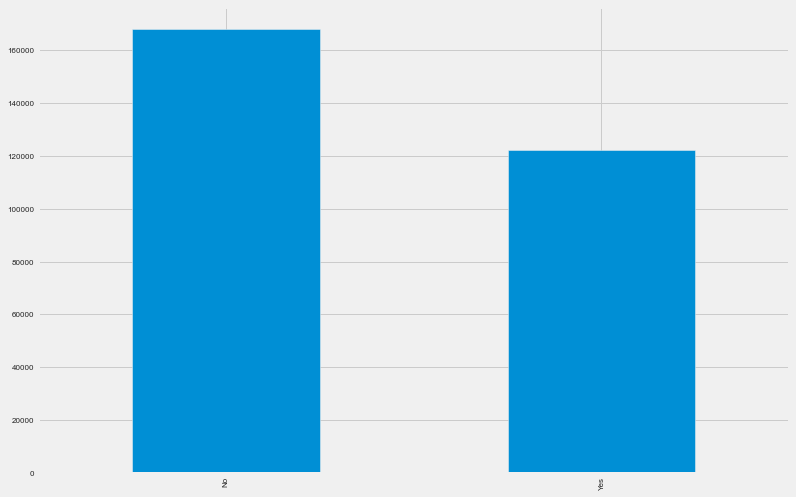

In [809]:
train.Credit_Product.value_counts().plot(kind="bar")

In [810]:
train.Credit_Product=train.Credit_Product.replace('No',0)
train.Credit_Product=train.Credit_Product.replace('Yes',1)

In [811]:
# import numpy as np
# from sklearn.impute import KNNImputer
# X = [[1, 2, np.nan]]
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X).tolist()

In [721]:
# np.array(train.Credit_Product).reshape(1, -1)

In [812]:
train.Credit_Product=train.Credit_Product.fillna(method='pad')

In [813]:
columns_list=['Occupation','Channel_Code']

In [814]:
dummies_datas=generate_dummies_data(train[columns_list])

In [815]:
train.Is_Lead.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [816]:
training_data_collection=train.drop(['Occupation','Channel_Code','ID','Region_Code'],1)

In [817]:
training_data_collection.Is_Lead.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [818]:
training_data_collection=training_data_collection.reset_index().drop(['index'],1)

In [819]:
dummies_datas=dummies_datas.reset_index().drop(['index'],1)

In [820]:
training_data_collection.shape,dummies_datas.shape

((374874, 7), (374874, 8))

In [821]:
training_data_collection=training_data_collection.join(dummies_datas)

In [822]:
from sklearn.preprocessing import LabelEncoder

In [823]:
training_data_collection['Gender']=Label_Encoder(training_data_collection,'Gender')

In [824]:
training_data_collection['Is_Active']=Label_Encoder(training_data_collection,'Is_Active')

In [825]:
training_data_collection

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,54,91,NaN,1044210,0,1,0,1,0,0,0,0,1,0
1,0,59,93,0.0,590746,1,0,0,0,0,1,0,1,0,0
2,1,30,32,0.0,788753,0,1,0,0,0,1,1,0,0,0
3,0,30,32,1.0,1271000,0,0,0,0,1,0,1,0,0,0
4,0,85,13,0.0,349565,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374869,1,46,86,0.0,736644,1,1,0,0,0,1,0,1,0,0
374870,1,50,27,0.0,1680070,1,1,0,1,0,0,0,1,0,0
374871,0,32,33,0.0,849576,0,0,0,0,1,0,1,0,0,0
374872,0,49,98,0.0,1379544,1,1,0,0,1,0,0,0,1,0


# Checking data Normalization

In [826]:
skewed_features = training_data_collection.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

Occupation_Entrepreneur     7.370862
Channel_Code_X4             6.356263
Avg_Account_Balance         2.869118
Occupation_Salaried         1.093966
Occupation_Other            0.931440
Channel_Code_X2             0.813148
Channel_Code_X3             0.711392
Channel_Code_X1             0.709530
Vintage                     0.467056
Age                         0.449409
Is_Active                   0.347496
Credit_Product              0.315164
Occupation_Self_Employed    0.268044
Is_Lead                     0.000000
Gender                     -0.276413
dtype: float64

# Feature Selection...

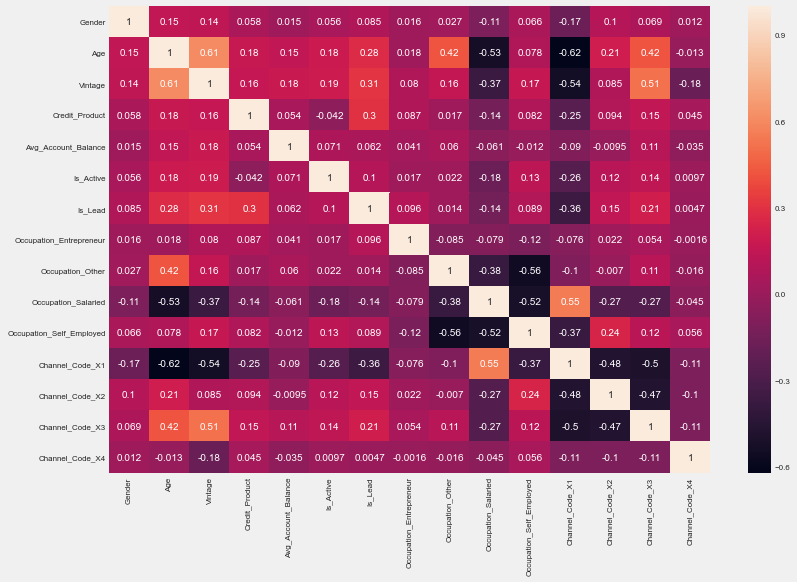

In [827]:
cor_relation=training_data_collection.corr()
sns.heatmap(cor_relation,annot=True)

In [828]:
X=training_data_collection.drop(['Is_Lead'],1)
y=training_data_collection.Is_Lead

In [829]:
y.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [830]:
from sklearn.feature_selection import mutual_info_classif

In [831]:
# importances=mutual_info_classif(X,y)

In [832]:
# df_importance=pd.Series(importances,X.columns[0:len(X.columns)])
# df_importance.plot(kind="barh",color="green")

In [833]:
# from sklearn.ensemble import ExtraTreesClassifier
# mod=ExtraTreesClassifier()
# mod.fit(X,y)

In [834]:
# pd.Series(mod.feature_importances_,index=X.columns).plot(kind="barh")

In [835]:
# most_imp_features=['Age','Vintage','Avg_Account_Balance','Credit_Product','Occupation_Entrepreneur',
#  'Occupation_Other',
#  'Occupation_Salaried',
#  'Occupation_Self_Employed',
#  'Channel_Code_X1',
#  'Channel_Code_X2',
#  'Channel_Code_X3',
#  'Channel_Code_X4']

In [836]:
X.columns.tolist()

['Gender',
 'Age',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'Occupation_Entrepreneur',
 'Occupation_Other',
 'Occupation_Salaried',
 'Occupation_Self_Employed',
 'Channel_Code_X1',
 'Channel_Code_X2',
 'Channel_Code_X3',
 'Channel_Code_X4']

In [837]:
from sklearn.feature_selection import chi2,SelectKBest

In [838]:
# best_feature=SelectKBest(score_func=chi2,k=14)
# best_feature_rank=best_feature.fit(X,y)

In [839]:
# s1=pd.DataFrame(best_feature_rank.scores_)
# s2=pd.DataFrame(X.columns)
# d=pd.concat([s1,s2],axis=1)
# d.columns=['score','feature']
# d.score.plot(kind="barh")

In [840]:
X_train=X

In [841]:
y.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [842]:
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,54,91,NaN,1044210,0,0,1,0,0,0,0,1,0
1,0,59,93,0.0,590746,1,0,0,0,1,0,1,0,0
2,1,30,32,0.0,788753,0,0,0,0,1,1,0,0,0
3,0,30,32,1.0,1271000,0,0,0,1,0,1,0,0,0
4,0,85,13,0.0,349565,1,0,1,0,0,0,1,0,0


In [873]:
X_train.Credit_Product=X_train.Credit_Product.replace('Yes',1)

In [874]:
x_train,x_test,y_train,y_test=train_test_split(X_train,y,train_size=.75,random_state=23)

In [875]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [876]:
model1=RandomForestClassifier()
model2=LogisticRegression()
model3=DecisionTreeClassifier()
model4=AdaBoostClassifier()
model5=ExtraTreesClassifier()
model6=GradientBoostingClassifier()#79
model7=BaggingClassifier()#76


In [877]:
# from sklearn.naive_bayes import GaussianNB



# RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=10, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=8,
#                        min_weight_fraction_leaf=0.0, n_estimators=1000,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)


In [878]:
X_train.isnull().sum()

Gender                      0
Age                         0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Occupation_Entrepreneur     0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X1             0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
dtype: int64

In [879]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [880]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
Use large max_bin (may be slower).
Use small learning_rate with large num_iterations
Use large num_leaves(may cause over-fitting)
Use bigger training data
Try dart
Try to use categorical feature directly.

In [916]:
from xgboost import XGBClassifier
m1=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
# for i,j in zip([3250,3500,3750,4000,5250],[0.12,0.15,0.19,.25,.35]):
model=lgb.LGBMClassifier(n_estimators=5000,learning_rate=0.25)
xgb_model = model.fit(x_train, y_train)

    # predict
xgb_y_predict = xgb_model.predict(x_test)

    # accuracy score
print(accuracy_score(xgb_y_predict, y_test))



0.8088221171800809


In [934]:

print(accuracy_score(y_test,xgb_y_predict))
print(confusion_matrix(y_test,xgb_y_predict))
print(classification_report(y_test,xgb_y_predict))
print(roc_auc_score(y_test,xgb_y_predict))

0.8088221171800809
[[36184 10658]
 [ 7259 39618]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     46842
           1       0.79      0.85      0.82     46877

    accuracy                           0.81     93719
   macro avg       0.81      0.81      0.81     93719
weighted avg       0.81      0.81      0.81     93719

0.8088085459853079


In [918]:
with os.scandir(r'Analytics Vidya/test') as entries:
    for entry in entries:
        test=file_importing().file_importing(entry)

In [919]:
Need_id=test.ID

In [920]:
def Label_Encoder(df,column_name):
    return LabelEncoder().fit_transform(df[column_name])
def generate_dummies_data(columns_list):
    return pd.get_dummies(columns_list)

In [921]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [922]:
test.Gender=Label_Encoder(test,'Gender')

In [923]:
test_dummy=generate_dummies_data(test[['Occupation','Channel_Code']])

In [924]:
test_=test.drop(['ID','Region_Code','Occupation','Channel_Code'],1)

In [925]:
test_.Credit_Product=test_.Credit_Product.fillna(method='ffill')

In [926]:
test_.isnull().sum()

Gender                 0
Age                    0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [927]:
test_.Credit_Product=Label_Encoder(test_,'Credit_Product')

In [928]:
test_.Is_Active=Label_Encoder(test_,'Is_Active')

In [929]:
test_training=test_.join(test_dummy)

In [930]:
test_training

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,25,1,742366,0,0,1,0,0,1,0,0,0
1,1,43,49,1,925537,0,0,1,0,0,0,1,0,0
2,1,31,14,0,215949,0,0,0,1,0,1,0,0,0
3,1,29,33,0,868070,0,0,1,0,0,1,0,0,0
4,0,29,19,0,657087,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1,52,86,1,4242558,1,0,0,1,0,0,1,0,0
105308,1,55,86,1,1159153,0,0,1,0,0,0,1,0,0
105309,1,35,15,0,1703727,0,0,0,1,0,0,0,0,1
105310,1,53,93,0,737178,1,0,1,0,0,0,0,1,0


In [931]:
X_train.shape

(374874, 14)

In [932]:
y.value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [933]:
import lightgbm as lgb

In [935]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
model=lgb.LGBMClassifier(n_estimators=5000,learning_rate=0.25)
xgb_model = model.fit(x_train, y_train)
#xgb_model = GradientBoostingClassifier().fit(X_train,y)

# predict
preds = xgb_model.predict(test_training)


In [936]:
len(preds),len(Need_id)

(105312, 105312)

In [937]:
df=pd.DataFrame({'ID':Need_id,'Is_Lead':preds})

In [938]:
df.to_csv("sums_9.csv",index=False)

In [513]:
d=xgb_model.predict(test_training)

In [515]:
d.tolist()

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
